## Module 5 : Understanding Classification Model Performance Metrics
### Aishwarya Deshmane, Xin Xiang

### Introduction:

The data set is comprised of 181 labeled binary observations and the classifications are either ‘0’ or ‘1’. It has column "class" with actual classification and "scored.class" with predicted classification. It also has the probability score.

The task is to understand and create the defined functions to calculate classification metrics and compare it with the in-built defined functions

In [1]:
#1
#load the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#2
#load data from github
path = "https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/M5_Data.csv"
df = pd.read_csv(path)

In [3]:
df

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491
...,...,...,...,...,...,...,...,...,...,...,...
176,5,123,74,40,77,34.1,0.269,28,0,0,0.311420
177,4,146,78,0,0,38.5,0.520,67,1,1,0.707210
178,8,188,78,0,0,47.9,0.137,43,1,1,0.888277
179,9,120,72,22,56,20.8,0.733,48,0,0,0.422468


In [4]:
#3.a
#crosstab the counts of Actual vs predicted
ct = pd.crosstab(df['class'],df['scored.class']).T
ct

class,0,1
scored.class,,
0,119,30
1,5,27


- Class has the actual values and scored class has the predicted values
- Actual classification has 119+5 = 24 zeros and 30+27 = 57 ones in it
- Predicted classification has 119+30 = 149 zeros and 5+27 = 32 ones in it
- Verified the counts below using value_counts()

In [5]:
#3.b
#value_counts of actual classification
df['class'].value_counts()

0    124
1     57
Name: class, dtype: int64

In [6]:
#3.c
#values_counts of predicted classification
df['scored.class'].value_counts()

0    149
1     32
Name: scored.class, dtype: int64

In [7]:
#verify the count if predicted values are 1 when probability is greater than 1
df['scored.probability'].value_counts(bins = 15)

(0.0848, 0.146]     36
(0.0213, 0.0848]    25
(0.146, 0.208]      22
(0.269, 0.331]      20
(0.208, 0.269]      13
(0.331, 0.392]      12
(0.454, 0.516]      11
(0.392, 0.454]      10
(0.577, 0.639]       6
(0.639, 0.7]         6
(0.516, 0.577]       5
(0.823, 0.885]       5
(0.7, 0.762]         4
(0.885, 0.946]       4
(0.762, 0.823]       2
Name: scored.probability, dtype: int64

In [8]:
#4
#Assign and print the values of confusion matrix
TP = ct.iloc[1,1]
print("True Positive :",TP)
TN = ct.iloc[0,0]
print("True Negative :",TN)
FP = ct.iloc[1,0]
print("False Positive :",FP)
FN = ct.iloc[0,1]
print("False Negative :",FN)

True Positive : 27
True Negative : 119
False Positive : 5
False Negative : 30


### Define functions for the required metrics

In [9]:
#5
#Accuracy metric
def accuracy_m(col1,col2):
    '''
    This function will calculate the accuracy.
    It takes 2 binary columns as inputs, col1- actual values and col2- predicted values.
    It creates dataframe with the input columns and calculate crosstab.
    Assigns the values of confusion matrix and calculates the score.
    '''
    df1 = pd.DataFrame()
    df1['col1'] = col1
    df1['col2'] = col2
    ct1 = pd.crosstab(df1['col1'],df1['col2']).T
    tp_1 = ct1.iloc[1,1]
    tn_1 = ct1.iloc[0,0]
    fp_1 = ct1.iloc[1,0]
    fn_1 = ct1.iloc[0,1]
    
    acc_m = (tp_1+tn_1)/(tp_1+tn_1+fp_1+fn_1)
    
    return acc_m

In [10]:
#6
#Precision metric
def precision_m(col1,col2):
    '''
    This function will calculate the precision.
    It takes 2 binary columns as inputs, col1- actual values and col2- predicted values.
    It creates dataframe with the input columns and calculate crosstab.
    Assigns the values of confusion matrix and calculates the score.
    '''
    df1 = pd.DataFrame()
    df1['col1'] = col1
    df1['col2'] = col2
    ct1 = pd.crosstab(df1['col1'],df1['col2']).T
    tp_1 = ct1.iloc[1,1]
    tn_1 = ct1.iloc[0,0]
    fp_1 = ct1.iloc[1,0]
    fn_1 = ct1.iloc[0,1]
    
    prc_m = (tp_1)/(tp_1+fp_1)
    
    return prc_m

In [11]:
#7
#Sensitivity or recall metric
def recall_m(col1,col2):
    '''
    This function will calculate the recall.
    It takes 2 binary columns as inputs, col1- actual values and col2- predicted values.
    It creates dataframe with the input columns and calculate crosstab.
    Assigns the values of confusion matrix and calculates the score.
    '''
    df1 = pd.DataFrame()
    df1['col1'] = col1
    df1['col2'] = col2
    ct1 = pd.crosstab(df1['col1'],df1['col2']).T
    tp_1 = ct1.iloc[1,1]
    tn_1 = ct1.iloc[0,0]
    fp_1 = ct1.iloc[1,0]
    fn_1 = ct1.iloc[0,1]
    
    rec_m = (tp_1)/(tp_1+fn_1)
    
    return rec_m

In [12]:
#8
#Specificity metric
def specificity_m(col1,col2):
    '''
    This function will calculate the specificity.
    It takes 2 binary columns as inputs, col1- actual values and col2- predicted values.
    It creates dataframe with the input columns and calculate crosstab.
    Assigns the values of confusion matrix and calculates the score.
    '''
    df1 = pd.DataFrame()
    df1['col1'] = col1
    df1['col2'] = col2
    ct1 = pd.crosstab(df1['col1'],df1['col2']).T
    tp_1 = ct1.iloc[1,1]
    tn_1 = ct1.iloc[0,0]
    fp_1 = ct1.iloc[1,0]
    fn_1 = ct1.iloc[0,1]
    
    spc_m = (tn_1)/(tn_1+fp_1)
    
    return spc_m

In [13]:
#9
#F-1 metric
def f1_m(col1,col2):
    '''
    This function will calculate the F-1 score.
    It takes 2 binary columns as inputs, col1- actual values and col2- predicted values.
    It creates dataframe with the input columns and calculate crosstab.
    Assigns the values of confusion matrix and calculates the precision and recall.
    Calculates F_1 score using precision and recall scores.
    '''
    df1 = pd.DataFrame()
    df1['col1'] = col1
    df1['col2'] = col2
    ct1 = pd.crosstab(df1['col1'],df1['col2']).T
    tp_1 = ct1.iloc[1,1]
    tn_1 = ct1.iloc[0,0]
    fp_1 = ct1.iloc[1,0]
    fn_1 = ct1.iloc[0,1]
    fs_m = (tn_1)/(tn_1+fp_1)
    
    p = (tp_1)/(tp_1+fp_1)
    r = (tp_1)/(tp_1+fn_1)
    
    fs_m = (2*p*r)/(p+r)
    
    return fs_m

In [14]:
#10
#ROC curve and AUC
def roc_auc_m(col1,col2):
    '''
    This function will calculate the roc curve and auc.
    It takes 2 binary columns as inputs, col1- actual values and col2- probability values.
    it uses thresholds to get each scores.probability and create a null tpr list and fpr list to prapare store the value 
    it use only true value to calculate the postive numbers and negatiave numbers
    then use for loop to get the threshhold and the index
    in the for loop, create a new column called pred to stroe if the score is greater than probablity threshhold
    then calculate the tp,fp value and store tpr and fpr in the corresponive list.
    
    use plot function to draw a plot of tpr and fpr
    
    finally use trapz function to calculate the AUC value
    '''
    # Get the unique thresholds in descending order
    thresholds = np.unique(np.sort(col2))[::-1]

    # Initialize variables to store false positive rates (FPR) and true positive rates (TPR)
    tpr = np.zeros(len(thresholds))
    fpr = np.zeros(len(thresholds))

    # Calculate the total number of positive and negative instances
    num_pos = np.sum(col1)
    num_neg = len(col1) - num_pos

    # Loop over each threshold to calculate TPR and FPR
    for i, threshold in enumerate(thresholds):
        # Get the binary predictions for the current threshold
        y_pred = np.where(col2 >= threshold, 1, 0)

        # Calculate the true positive rate (TPR) and false positive rate (FPR)
        tp = np.sum(np.logical_and(y_pred == 1, col1 == 1))
        fp = np.sum(np.logical_and(y_pred == 1, col1 == 0))
        tpr[i] = tp / num_pos
        fpr[i] = fp / num_neg

    # Plot the ROC curve
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Calculate the AUC (Area Under the Curve) for the ROC curve using the trapezoidal rule
    auc = np.trapz(tpr, fpr)

    # Return the AUC value
    return auc

#citation for ROC curve and AUC: chagpt

### Print the metrics scores using above defined functions

In [15]:
#11.a
#print accuracy score using defined function
accuracy_m(df['class'],df['scored.class'])

0.8066298342541437

In [16]:
#11.b
#print precision score using defined function
precision_m(df['class'],df['scored.class'])

0.84375

In [17]:
#11.c
#print recall score using defined function
recall_m(df['class'],df['scored.class'])

0.47368421052631576

In [18]:
#11.d
#print specificity score using defined function
specificity_m(df['class'],df['scored.class'])

0.9596774193548387

In [19]:
#11.e
#print F_1 score using defined function
f1_m(df['class'],df['scored.class'])

0.6067415730337079

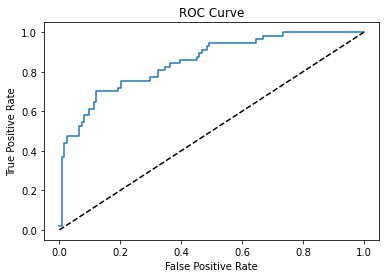

0.85

In [20]:
#11.f
#print AUC score using defined function
round(roc_auc_m(df['class'],df['scored.probability']),3)

### Calculate the scores using in-built functions

In [21]:
#12
#load libraries from sklearn to calculate the scores using in-built functions
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report, roc_curve, roc_auc_score

In [22]:
confusion_matrix(df['class'],df['scored.class'])

array([[119,   5],
       [ 30,  27]])

In [23]:
accuracy_score(df['class'],df['scored.class'])

0.8066298342541437

In [24]:
precision_score(df['class'],df['scored.class'])

0.84375

In [25]:
recall_score(df['class'],df['scored.class'])

0.47368421052631576

In [26]:
f1_score(df['class'],df['scored.class'])

0.6067415730337079

In [27]:
print(classification_report(df['class'],df['scored.class']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



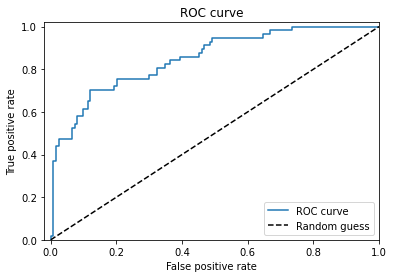

In [28]:
fpr,tpr,threshold = roc_curve(df['class'],df['scored.probability'])
plt.plot(fpr,tpr,label = "ROC curve")
plt.plot([0,1],[0,1],'k--',label="Random guess")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.xlim([-0.02,1])
plt.ylim([0,1.02])
plt.legend(loc = "lower right")

In [29]:
round(roc_auc_score(df['class'],df['scored.probability']),3)

0.85

### Compare the scores with defined functions and in-built functions

In [30]:
accuracy_m(df['class'],df['scored.class']) == accuracy_score(df['class'],df['scored.class'])

True

In [31]:
precision_m(df['class'],df['scored.class']) == precision_score(df['class'],df['scored.class'])

True

In [32]:
recall_m(df['class'],df['scored.class']) == recall_score(df['class'],df['scored.class'])

True

In [33]:
f1_m(df['class'],df['scored.class']) == f1_score(df['class'],df['scored.class'])

True

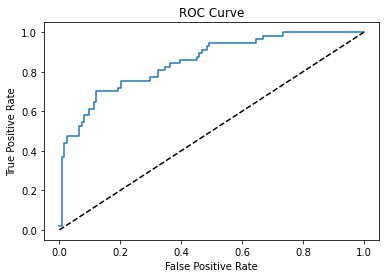

True

In [34]:
round(roc_auc_m(df['class'],df['scored.probability']),3) == round(roc_auc_score(df['class'],df['scored.probability']),3)                                                                 

The scores calculated with defined functions is same as the score calculated using sklearn in-built functions

### Conclusion:
For the given dataset-
- Accuracy score is 81%
- Precision score is 84%
- Recall or sensitivity score is 47%
- Specificity score is 96%
- F_1 score is 61%
- AUC score is 85%
- The scores calculated using defined functions matches the score calculated using in-built functions